# 2 Marks Question : 4 *2 = 8 Marks 

#### 1.What is the difference between Stemming and Lemmatization?


- Stemming algorithms works by cutting off the end or the beginning of the word,a list of common prefixes and suffixes that can be found in an word. This cutting can be successful in some occasions, but not always, this approach presents some limitations. eg: Studies --> Studies

- Lemmatization, takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma.Another important difference to highlight is that a lemma is the base form of all its inflectional forms, whereas a stem isn’t ,eg: Studies --> Studi

#### 2.What is significance of TF-IDF?

TFIDF is an information retrieval technique that weighs a term’s frequency (TF) and its inverse document frequency (IDF). Each word or term has its respective TF and IDF score. The product of the TF and IDF scores of a term is called the TFIDF weight of that term.

The higher the TF*IDF score (weight), the rarer the term and vice versa.

The TF*IDF algorithm is used to weigh a keyword in any content and assign the importance to that keyword based on the number of times it appears in the document. More importantly, it checks how relevant the keyword is throughout the web, which is referred to as corpus.

TF*IDF Defined The TF (term frequency) of a word is the frequency of a word (i.e. number of times it appears) in a document. 


#### 3.Explain dependency parsing in NLP?

- A dependency parser analyzes the grammatical structure of a sentence, establishing relationships between "head" words and words which modify those heads. 

#### 4.Which is better to use while extracting features character n-grams or word n-grams? Why?

- N-grams are contiguous sequences of n-items in a sentence. N can be 1, 2 or any other positive integers, usually we do not consider very large N because those n-grams rarely appears in many different places.

- When performing machine learning tasks related to natural language processing, we usually need to generate n-grams from input sentences. For example, in text classification tasks, in addition to using each individual token found in the corpus, we may want to add bi-grams or tri-grams as features to represent our documents. 

# 3 Marks Question : 5 *3 = 15 Marks 

#### 5.Write a function to calculate the word length of each sentence(3marks)

In [97]:
import nltk
def fun(text):
    docs = text['text'].str.lower()
    docs = docs.str.replace('[^a-z ]','')
    docs_clean = []
    for doc in docs:
        words = doc.split(' ')
        print( "Word Length:", len(words),words)
        print('------------')

In [98]:
import pandas as pd
%matplotlib inline
from wordcloud import WordCloud
import matplotlib.pyplot as plt
text=pd.DataFrame([['I love India I Love Data Science'],['This is sentence two'],['This is the last @sentence']],columns=['text'])
text
fun(text)

Word Length: 7 ['i', 'love', 'india', 'i', 'love', 'data', 'science']
------------
Word Length: 4 ['this', 'is', 'sentence', 'two']
------------
Word Length: 5 ['this', 'is', 'the', 'last', 'sentence']
------------


#### 6.Write a code to remove rarely occurring words from the text (3 marks)

In [99]:
text=pd.DataFrame([['I love India I Love Data Science'],['I love India This is sentence two'],['I love India, This is the last @sentence']],columns=['text'])
text

,text
0,I love India I Love Data Science
1,I love India This is sentence two
2,"I love India, This is the last @sentence"


In [100]:
docs=text['text'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [w  for w in words]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0          i love india i love data science
1         i love india this is sentence two
2    i love india this is the last sentence
Name: text, dtype: object

In [101]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm
   

<3x10 sparse matrix of type '<class 'numpy.int64'>'
	with 17 stored elements in Compressed Sparse Row format>

In [102]:
df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm

,data,india,is,last,love,science,sentence,the,this,two
0,1,1,0,0,2,1,0,0,0,0
1,0,1,1,0,1,0,1,0,1,1
2,0,1,1,1,1,0,1,1,1,0


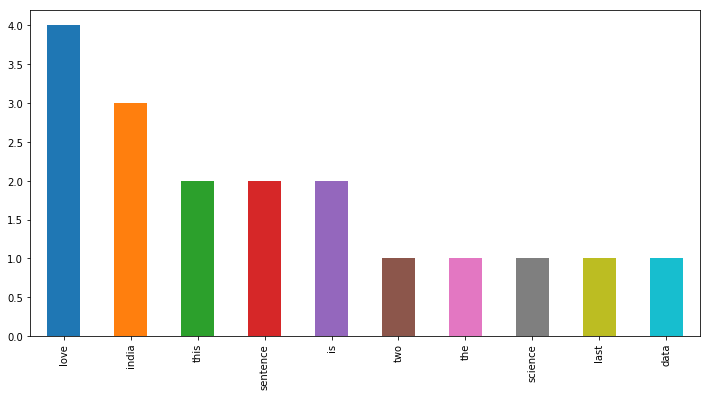

In [103]:
%matplotlib inline
df_dtm.sum().sort_values(ascending=False).head(20).plot.bar(figsize=(12,6))

In [104]:
# Two, the ,science, last, data are the rarely occuring words and it should be removed
docs=text['text'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [w  for w in words if w not in ('two', 'the' ,'science', 'last', 'data')]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0              i love india i love
1    i love india this is sentence
2    i love india this is sentence
Name: text, dtype: object

#### 7.Explain the steps involved in web scrapping.

- Install Selenium, then import the webdriver - 

selenium is used for webscrapping and the webdriver is used to connect to the browser

Example:

from selenium import webdriver

browser=webdriver.Chrome('chromedriver.exe')

- Find the URL from which we want to scrape the data- 


Example :

url='https://en.wikipedia.org/wiki/Machine_learning'
browser.get(url)                                

- Identify the structure of the sites HTML 
   
   Before doing anything further we should first understand the structure of the website because we want to scrape data from certain HTML elements, or elements with specific classes or IDs. With the inspect tool in the web browser, we can quickly identify which all elements we need to use in our code.
 

- Web Scraping Code

Once we have identified the elements then start with scrapping the data for example, the code below will scrap the data from the paragraph elements in the webpage

example: ptags=browser.find_elements_by_css_selector('p')  



#### 8. Many mobile applications provide a way to screen incoming SMS as spam. With 95% accuracy the company is able to classify sms as spam or ham. And there is always space for improvement. Your task is to use any of the machine learning models to improve the accuracy of the model to above 96%
        a. Use encoding=’cp1252’ while reading the data (spam.csv) using pandas, since this data set contains other languages
        b. Make sure that you split the data in to train (70%) and test (30%). Use random_state=100, while using train_test_split function to set the seed
        c. Print the following metrics
            i. Accuracy, sensitivity, specificity, F1 score

In [105]:
import pandas as pd
df1=pd.read_csv('spam.csv',encoding='cp1252')
df1.head(10)

,label,text
0,NaN,NaN
1,ham,"Go until jurong point, crazy.. Available only ..."
2,NaN,NaN
3,ham,Ok lar... Joking wif u oni...
4,NaN,NaN
5,spam,Free entry in 2 a wkly comp to win FA Cup fina...
6,NaN,NaN
7,ham,U dun say so early hor... U c already then say...
8,NaN,NaN
9,ham,"Nah I don't think he goes to usf, he lives aro..."


In [106]:
df1.dropna(axis=0,inplace=True) # Dropping Null Values

In [107]:
df1.head()

,label,text
1,ham,"Go until jurong point, crazy.. Available only ..."
3,ham,Ok lar... Joking wif u oni...
5,spam,Free entry in 2 a wkly comp to win FA Cup fina...
7,ham,U dun say so early hor... U c already then say...
9,ham,"Nah I don't think he goes to usf, he lives aro..."


In [108]:
df1['label'].replace({'ham':1,'spam':0},inplace=True)

In [109]:
df1.head()

,label,text
1,1,"Go until jurong point, crazy.. Available only ..."
3,1,Ok lar... Joking wif u oni...
5,0,Free entry in 2 a wkly comp to win FA Cup fina...
7,1,U dun say so early hor... U c already then say...
9,1,"Nah I don't think he goes to usf, he lives aro..."


In [110]:
import nltk
docs=df1['text'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

1    go jurong point crazi avail bugi n great world...
3                                ok lar joke wif u oni
5    free entri  wkli comp win fa cup final tkt st ...
7                  u dun say earli hor u c alreadi say
9            nah dont think goe usf live around though
Name: text, dtype: object

In [111]:
# splitting of Data
x=docs_clean
y=df1['label']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=100)

vectorizer = CountVectorizer()
vectorizer.fit(xtrain)
dtm_train= vectorizer.transform(xtrain)
dtm_test = vectorizer.transform(xtest)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape,df_dtm_test.shape

((3900, 5877), (1672, 5877))

In [112]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model_rf = RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(df_dtm_train,ytrain)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [113]:
pred_class=model_rf.predict(df_dtm_test)  

In [114]:
accuracy_score(ytest,pred_class)

0.9766746411483254

In [115]:
from sklearn.naive_bayes import MultinomialNB
nb_clfr=MultinomialNB()
nb_clfr.fit(df_dtm_train,ytrain)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(ytest,pred_class)

# Accuracy = 0.98

0.9832535885167464

In [116]:
from sklearn.metrics import classification_report

# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class))      

              precision    recall  f1-score   support

           0       0.94      0.93      0.93       213
           1       0.99      0.99      0.99      1459

   micro avg       0.98      0.98      0.98      1672
   macro avg       0.96      0.96      0.96      1672
weighted avg       0.98      0.98      0.98      1672



#### 9. Let’s take a corpus
All my penguins in a row’,
‘When my penguin sits down, it looks like a Furby toy!’
Create a bag of words code for this corpus which includes feature vector representation.

In [117]:
text1=pd.DataFrame([['All my penguins in a row'],
['When my penguin sits down, it looks like a Furby toy!']],columns=['text'])
text1

,text
0,All my penguins in a row
1,"When my penguin sits down, it looks like a Fur..."


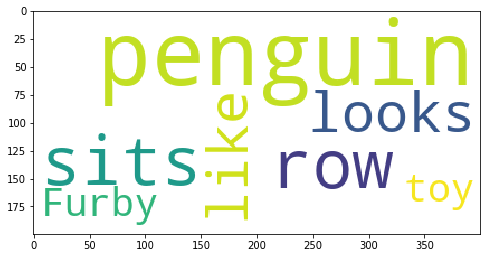

In [118]:
plt.figure(figsize=(8,8))
text=' '.join(text1['text'])
stopwords = nltk.corpus.stopwords.words('english')
wc=WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [119]:
docs=text1['text'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [w  for w in words]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

0                             all my penguins in a row
1    when my penguin sits down it looks like a furb...
Name: text, dtype: object

In [120]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=1, ngram_range=(1,1)) 
# min frequency for a term to appear, ngram is for specifing uni,bigram, inside brackets of ngram range the value is unigram, bigram, tri etc
vectorizer.fit(docs_clean)
dtm=vectorizer.transform(docs_clean)
dtm
   

<2x14 sparse matrix of type '<class 'numpy.int64'>'
	with 15 stored elements in Compressed Sparse Row format>

In [121]:

df_dtm= pd.DataFrame(dtm.toarray(),columns=vectorizer.get_feature_names())
df_dtm

,all,down,furby,in,it,like,looks,my,penguin,penguins,row,sits,toy,when
0,1,0,0,1,0,0,0,1,0,1,1,0,0,0
1,0,1,1,0,1,1,1,1,1,0,0,1,1,1


In [122]:
# Feature Vector Representation
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(docs_clean)
dtm_final= vectorizer.transform(docs_clean)

In [123]:
features = vectorizer.get_feature_names()
df_dtm_final= pd.DataFrame(dtm_final.toarray(),columns=features)

In [124]:
df_dtm_final

,all,down,furby,in,it,like,looks,my,penguin,penguins,row,sits,toy,when
0,0.471078,0.000000,0.000000,0.471078,0.000000,0.000000,0.000000,0.335176,0.000000,0.471078,0.471078,0.000000,0.000000,0.000000
1,0.000000,0.324336,0.324336,0.000000,0.324336,0.324336,0.324336,0.230768,0.324336,0.000000,0.000000,0.324336,0.324336,0.324336


####    10. Using Yelp reviews data set (https://bit.ly/2U7mLmC), create a supervised model to predict the sentiment of user reviews.
        a. Create a word cloud using the user reviews
        b. Use random_state=100 while splitting data in to training (80%) and testing(20%).
        c. Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
        d. Build various supervised classification models using the training data set
        e. Predict and compute accuracy of the model on test data set
        f. Identify which model is best for sentiment prediction

Identify sentiment for the yelp reviews using vader package. Comment the performance of supervised vs unsupervised sentiment prediction.


In [125]:
df=pd.read_csv('yelp_labelled.csv',header=-1)

In [126]:
df.columns=['review','Sentiment','1','2','3','4']

In [127]:
df.head()

,review,Sentiment,1,2,3,4
0,Wow... Loved this place.,1,NaN,NaN,NaN,NaN
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
3,Stopped by during the late May bank holiday of...,1,NaN,NaN,NaN,NaN
4,The selection on the menu was great and so wer...,1,NaN,NaN,NaN,NaN


In [128]:
df.shape

(992, 6)

In [129]:
df.isnull().sum()

review         0
Sentiment      1
1            703
2            929
3            980
4            991
dtype: int64

In [130]:
df[df.Sentiment.isnull()]

,review,Sentiment,1,2,3,4
383,I will continue to come here on ladies night a...,NaN,1,NaN,NaN,NaN


In [131]:
#df.Sentiment.fillna(0,inplace=True)

In [132]:
df.isnull().sum()

review         0
Sentiment      1
1            703
2            929
3            980
4            991
dtype: int64

In [133]:
df4=pd.concat([df[df.Sentiment=='0'],df[df.Sentiment=='1']],axis=0)

In [134]:
df4.head()

,review,Sentiment,1,2,3,4
1,Crust is not good.,0,NaN,NaN,NaN,NaN
2,Not tasty and the texture was just nasty.,0,NaN,NaN,NaN,NaN
5,Now I am getting angry and I want my damn pho.,0,NaN,NaN,NaN,NaN
6,Honeslty it didn't taste THAT fresh.),0,NaN,NaN,NaN,NaN
7,The potatoes were like rubber and you could te...,0,NaN,NaN,NaN,NaN


In [135]:
# Drop the columns with null values

df4.dropna(axis=1,inplace=True)

In [136]:
df4.head()

,review,Sentiment
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
5,Now I am getting angry and I want my damn pho.,0
6,Honeslty it didn't taste THAT fresh.),0
7,The potatoes were like rubber and you could te...,0


In [137]:
df=df4

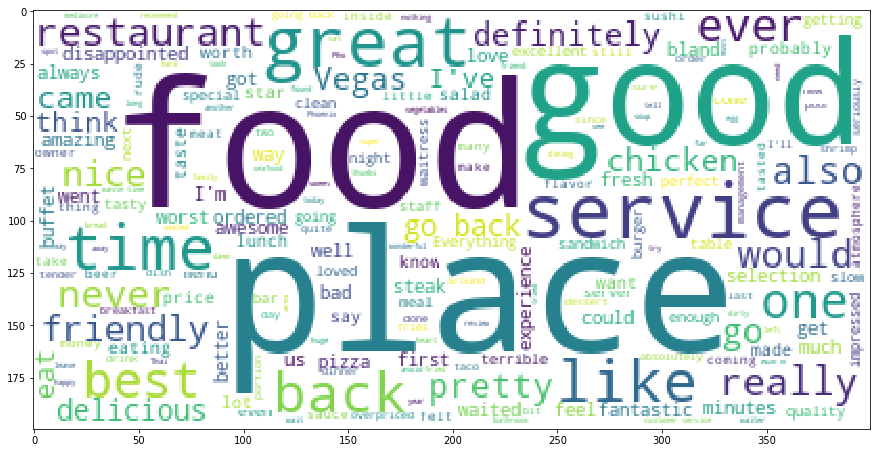

In [138]:
#  a.Create a word cloud using the user reviews

plt.figure(figsize=(15,10))
text=' '.join(df['review'])
stopwords = nltk.corpus.stopwords.words('english')
wc=WordCloud(background_color='white',stopwords=stopwords).generate(text)
plt.imshow(wc)

In [139]:

import nltk
docs=df['review'].str.lower().str.replace('[^a-z ]','') 
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend([])
stemmer = nltk.stem.PorterStemmer()

def clean_sentence(text):
    words = text.split(' ')
    words_clean = [stemmer.stem(w) for w in words if w not in stopwords]
    return ' '.join(words_clean)

docs_clean = docs.apply(clean_sentence)
docs_clean.head()

1                                           crust good
2                                   tasti textur nasti
5                              get angri want damn pho
6                            honeslti didnt tast fresh
7    potato like rubber could tell made ahead time ...
Name: review, dtype: object

In [140]:
# b. Use random_state=100 while splitting data in to training (80%) and testing(20%).


# splitting of Data
x=docs_clean
y=df['Sentiment']
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=100)

vectorizer = CountVectorizer()
vectorizer.fit(xtrain)
dtm_train= vectorizer.transform(xtrain)
dtm_test = vectorizer.transform(xtest)

features = vectorizer.get_feature_names()
df_dtm_train = pd.DataFrame(dtm_train.toarray(),columns=features)
df_dtm_test = pd.DataFrame(dtm_test.toarray(),columns=features)
df_dtm_train.shape,df_dtm_test.shape

((562, 1001), (141, 1001))

In [141]:
# Comment if the target variable contains balanced or imbalanced classes (In target variable: 0 = negative, 1 = positive sentiment)
df.Sentiment.value_counts()

# It Contains a balanced Class

0    354
1    349
Name: Sentiment, dtype: int64

##### d. Build various supervised classification models using the training data set
##### e. Predict and compute accuracy of the model on test data set
##### f. Identify which model is best for sentiment prediction

In [142]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


model_rf = RandomForestClassifier(n_estimators=300,random_state=100)
model_rf.fit(df_dtm_train,ytrain)



RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=100, verbose=0, warm_start=False)

In [143]:
pred_class=model_rf.predict(df_dtm_test)  
accuracy_score(ytest,pred_class)


0.8014184397163121

In [144]:
# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class)) 

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        80
           1       0.77      0.77      0.77        61

   micro avg       0.80      0.80      0.80       141
   macro avg       0.80      0.80      0.80       141
weighted avg       0.80      0.80      0.80       141



In [145]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB
nb_clfr=MultinomialNB()
nb_clfr.fit(df_dtm_train,ytrain)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(ytest,pred_class)


0.7943262411347518

In [146]:
from sklearn.metrics import classification_report

# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class))   

              precision    recall  f1-score   support

           0       0.89      0.72      0.80        80
           1       0.71      0.89      0.79        61

   micro avg       0.79      0.79      0.79       141
   macro avg       0.80      0.81      0.79       141
weighted avg       0.81      0.79      0.79       141



In [147]:
nb_clfr=GaussianNB()
nb_clfr.fit(df_dtm_train,ytrain)
pred_class=nb_clfr.predict(df_dtm_test)
accuracy_score(ytest,pred_class)

0.7375886524822695

In [148]:
# sensitivity(Recall), specificity(Precision), F1 score 
print(classification_report(ytest,pred_class))   

              precision    recall  f1-score   support

           0       0.85      0.65      0.74        80
           1       0.65      0.85      0.74        61

   micro avg       0.74      0.74      0.74       141
   macro avg       0.75      0.75      0.74       141
weighted avg       0.76      0.74      0.74       141



#### f. Identify which model is best for sentiment prediction

#####  From the above we can understand that Random Forest is the best model becasue it is giving an accuracy of 80.14, the also gives the best  precision,recall,  f1-score   